In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
customer_feedback = pd.read_csv("cleaned/customer_feedback_cleaned.csv")
customer = pd.read_csv("cleaned/customer_cleaned.csv")
expansion_outcome = pd.read_csv("cleaned/expansion_outcome_cleaned.csv")
product = pd.read_csv("cleaned/product_cleaned.csv")
utilization = pd.read_csv("cleaned/utilization_cleaned.csv")

In [3]:
merged_data = (
    customer
    .merge(customer_feedback, on=["id", "score_date"], how="left")
    .merge(expansion_outcome, on=["id", "score_date"], how="left")
    .merge(product, on=["id", "score_date"], how="left")
    .merge(utilization, on=["id", "score_date"], how="left")
)

In [4]:
merged_data.to_csv("merged_data.csv", index=False)

In [5]:
df=pd.read_csv("merged_data.csv")

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13389 non-null  object 
 1   score_date                           13389 non-null  object 
 2   segment_smb                          13389 non-null  int64  
 3   segment_non_smb                      13389 non-null  int64  
 4   segment_commercial                   13389 non-null  int64  
 5   segment_enterprise                   13389 non-null  int64  
 6   segment_midmarket                    13389 non-null  int64  
 7   region_emea                          13389 non-null  int64  
 8   region_apac                          13389 non-null  int64  
 9   region_latam                         13389 non-null  int64  
 10  region_amer                          13389 non-null  int64  
 11  customer_age_quarters       

In [7]:
print(df.head(10))

              id  score_date  segment_smb  segment_non_smb  \
0   JMAN_2429072  2023-02-10            1                0   
1   JMAN_9043466  2023-01-13            0                1   
2   JMAN_2452556  2023-02-24            0                1   
3   JMAN_2455113  2023-03-03            0                1   
4  JMAN_18127937  2023-02-10            0                1   
5   JMAN_2373631  2023-03-03            0                1   
6   JMAN_2447279  2023-03-03            1                0   
7   JMAN_9004478  2023-01-20            1                0   
8   JMAN_2477864  2023-03-24            1                0   
9   JMAN_2445629  2023-01-20            0                1   

   segment_commercial  segment_enterprise  segment_midmarket  region_emea  \
0                   0                   0                  0            1   
1                   1                   0                  0            1   
2                   0                   0                  0            1   
3        

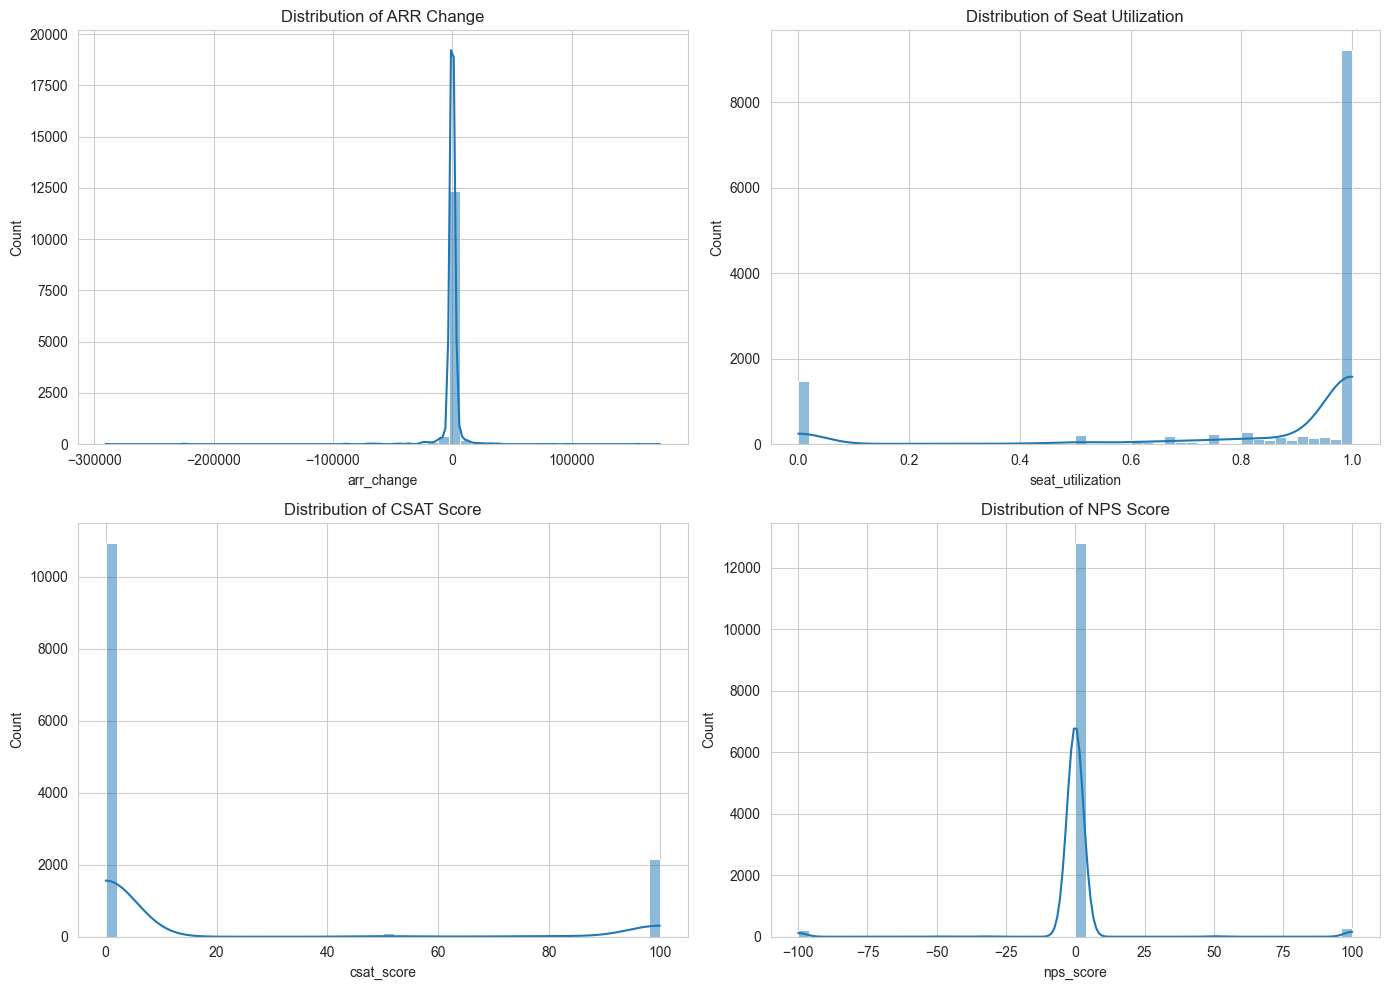

In [8]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df["arr_change"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of ARR Change")

sns.histplot(df["seat_utilization"], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Seat Utilization")

sns.histplot(df["csat_score"], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of CSAT Score")

sns.histplot(df["nps_score"], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of NPS Score")

plt.tight_layout()
plt.show()


In [17]:
df.to_csv("final_data.csv", index=False)